In [1]:
import pandas as pd
from pybrainlife.data.collect import collect_data
import pybrainlife.data.manipulate as pybldm
import pybrainlife.vis.plots as pyblvp
import seaborn as sns

In [2]:
#!pip install --upgrade pybrainlife

In [3]:
# collect_data(datatype name, list of datatype tags, list of object tags, filename, output file name, whether it's a network adjaceny matrix or not)
tractmeasures_df,_,_ = collect_data('neuro/tractmeasures',['macro'],['curvature_0p25','curvature_0p5','curvature_1','curvature_2', 'curvature_4'],'tractmeasures.csv','tractmeasures_curvature.csv')
tractmeasures_df.head()

,structureID,StreamlineCount,volume,avgerageStreamlineLength,streamlineLengthStdev,averageFullDisplacement,fullDisplacementStdev,ExponentialFitA,ExponentialFitB,StreamlineLengthTotal,...,averageMidpointDistanceFromCentroid,stDevOfMidpointDistanceFromCentroid,TotalVolumeProportion,TotalCountProportion,TotalWiringProportion,subjectID,sessionID,tags,datatype_tags,finish_dates
0,wbfg,478,1131,31.850771,7.266175,31.117485,7.240334,0.090661,0.000455,15224.668464,...,NaN,NaN,1.000000,1.000000,1.000000,101107,1,"[2_26_2023, curvature_4]","[roi_trekker, macro]",2023-03-03T01:11:36.335Z
1,ROI_thalamus-8115_ROI_lh.pmhg,389,600,29.132848,0.845799,28.391715,0.948400,NaN,NaN,11332.677940,...,2.386465,1.120193,0.530504,0.813808,0.744363,101107,1,"[2_26_2023, curvature_4]","[roi_trekker, macro]",2023-03-03T01:11:36.335Z
2,ROI_thalamus-8215_ROI_rh.onset,69,510,49.277530,0.558342,48.477062,0.600560,NaN,NaN,3400.149601,...,1.004195,0.446475,0.450928,0.144351,0.223332,101107,1,"[2_26_2023, curvature_4]","[roi_trekker, macro]",2023-03-03T01:11:36.335Z
3,ROI_thalamus-8215_ROI_rh.pmhg,20,133,24.592046,0.425283,24.243168,0.408585,NaN,NaN,491.840922,...,0.678878,0.384133,0.117595,0.041841,0.032306,101107,1,"[2_26_2023, curvature_4]","[roi_trekker, macro]",2023-03-03T01:11:36.335Z
0,wbfg,310,6182,59.718081,19.362607,42.358385,13.761947,0.009339,0.050125,18512.605151,...,NaN,NaN,1.000000,1.000000,1.000000,169747,1,"[2_26_2023, curvature_0p5]","[roi_trekker, macro]",2023-03-03T03:37:37.876Z


In [4]:
tractmeasures_df['tags'] = [ f[1] for f in tractmeasures_df.tags ]
tractmeasures_df = tractmeasures_df.loc[tractmeasures_df['structureID'] != 'wbfg']
tractmeasures_df.head()

,structureID,StreamlineCount,volume,avgerageStreamlineLength,streamlineLengthStdev,averageFullDisplacement,fullDisplacementStdev,ExponentialFitA,ExponentialFitB,StreamlineLengthTotal,...,averageMidpointDistanceFromCentroid,stDevOfMidpointDistanceFromCentroid,TotalVolumeProportion,TotalCountProportion,TotalWiringProportion,subjectID,sessionID,tags,datatype_tags,finish_dates
1,ROI_thalamus-8115_ROI_lh.pmhg,389,600,29.132848,0.845799,28.391715,0.948400,NaN,NaN,11332.677940,...,2.386465,1.120193,0.530504,0.813808,0.744363,101107,1,curvature_4,"[roi_trekker, macro]",2023-03-03T01:11:36.335Z
2,ROI_thalamus-8215_ROI_rh.onset,69,510,49.277530,0.558342,48.477062,0.600560,NaN,NaN,3400.149601,...,1.004195,0.446475,0.450928,0.144351,0.223332,101107,1,curvature_4,"[roi_trekker, macro]",2023-03-03T01:11:36.335Z
3,ROI_thalamus-8215_ROI_rh.pmhg,20,133,24.592046,0.425283,24.243168,0.408585,NaN,NaN,491.840922,...,0.678878,0.384133,0.117595,0.041841,0.032306,101107,1,curvature_4,"[roi_trekker, macro]",2023-03-03T01:11:36.335Z
1,ROI_thalamus-8115_ROI_lh.onset,104,2668,73.873784,4.318541,54.259482,3.211679,NaN,NaN,7682.873505,...,3.790805,3.460683,0.431576,0.335484,0.415008,169747,1,curvature_0p5,"[roi_trekker, macro]",2023-03-03T03:37:37.876Z
2,ROI_thalamus-8115_ROI_lh.pmhg,111,1053,36.484899,10.824694,26.077224,1.774651,NaN,NaN,4049.823756,...,3.845689,4.268364,0.170333,0.358065,0.218760,169747,1,curvature_0p5,"[roi_trekker, macro]",2023-03-03T03:37:37.876Z


In [9]:
colorsPoss = ['blue', 'orange', 'green', 'red', 'purple', 'cadetblue', 'magenta', 'seagreen']
colors = colorsPoss[:len(tractmeasures_df.tags.unique())]
labels = ['lh.pmhg', 'rh.onset', 'rh.pmhg', 'lh.onset']

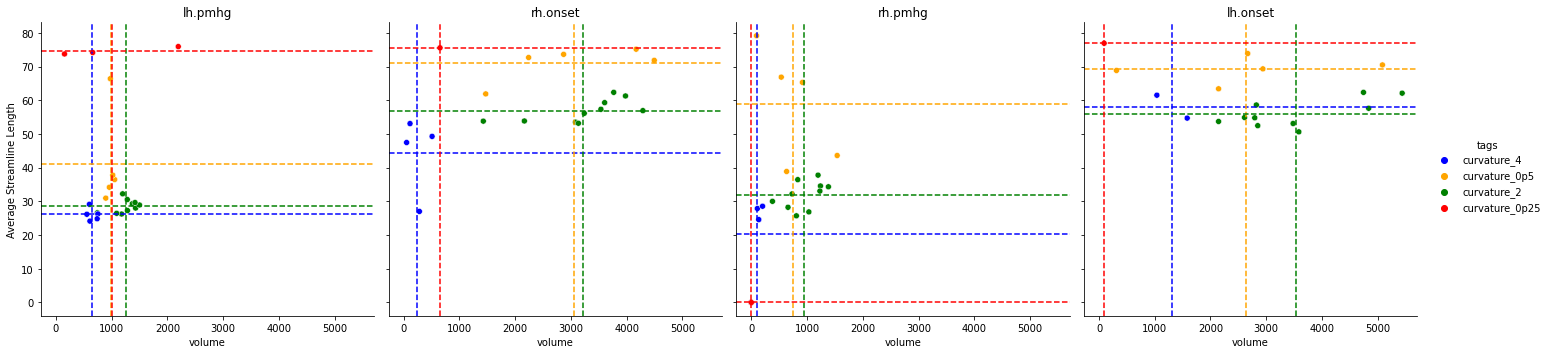

In [10]:
g = sns.relplot(x='volume',y='avgerageStreamlineLength',data=tractmeasures_df,hue='tags',col='structureID', palette = colors)

meansVol = []
meansLen = []

for tractID in tractmeasures_df.structureID.unique():
    for stepsize in tractmeasures_df.tags.unique():
        temp = tractmeasures_df[(tractmeasures_df['structureID'] == tractID) & (tractmeasures_df['tags'] == stepsize)]
        meansVol.append(temp.volume.mean())
        meansLen.append(temp.avgerageStreamlineLength.mean())
        
idx = 0
label_i = 0
for ax in g.axes.flat:
    for i in range(len(tractmeasures_df.tags.unique())):
        ax.axvline(meansVol[idx], ls = '--', color = colors[i])
        ax.axhline(meansLen[idx], ls = '--', color = colors[i])
        idx += 1
    ax.set_title(labels[label_i])
    if label_i == 0:
        ax.set_ylabel('Average Streamline Length')
    label_i += 1

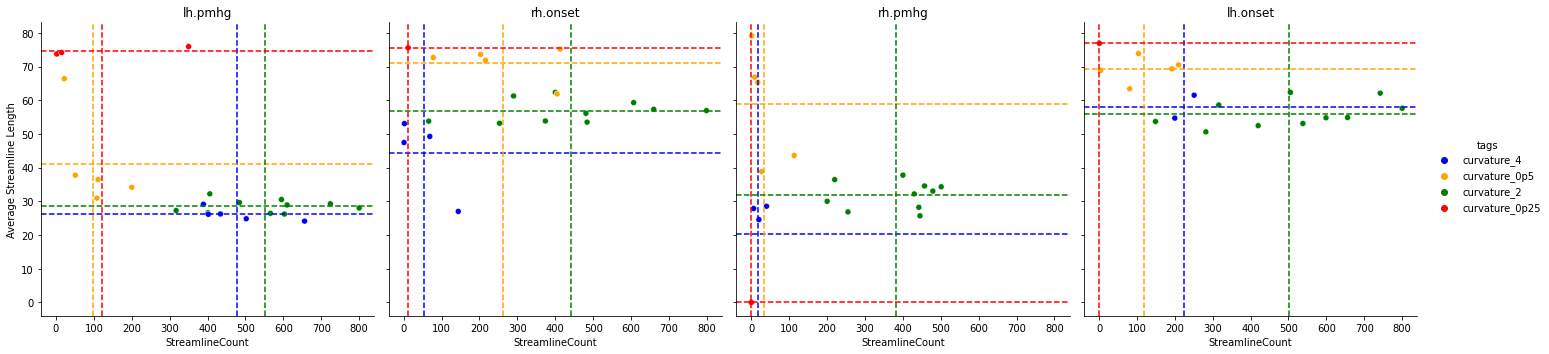

In [11]:
g = sns.relplot(x='StreamlineCount',y='avgerageStreamlineLength',data=tractmeasures_df,hue='tags',col='structureID', palette = colors)

meansCount = []
meansLen = []

for tractID in tractmeasures_df.structureID.unique():
    for stepsize in tractmeasures_df.tags.unique():
        temp = tractmeasures_df[(tractmeasures_df['structureID'] == tractID) & (tractmeasures_df['tags'] == stepsize)]
        meansCount.append(temp.StreamlineCount.mean())
        meansLen.append(temp.avgerageStreamlineLength.mean())
        
idx = 0
label_i = 0
for ax in g.axes.flat:
    for i in range(len(tractmeasures_df.tags.unique())):
        ax.axvline(meansCount[idx], ls = '--', color = colors[i])
        ax.axhline(meansLen[idx], ls = '--', color = colors[i])
        idx += 1
    ax.set_title(labels[label_i])
    if label_i == 0:
        ax.set_ylabel('Average Streamline Length')
    label_i += 1

In [8]:
tractmeasures_df.groupby(['structureID', 'tags']).count()

StreamlineCount  volume  \
structureID                    tags                                      
ROI_thalamus-8115_ROI_lh.onset curvature_0p25                1       1   
                               curvature_0p5                 5       5   
                               curvature_2                  10      10   
                               curvature_4                   2       2   
ROI_thalamus-8115_ROI_lh.pmhg  curvature_0p25                3       3   
                               curvature_0p5                 5       5   
                               curvature_2                  10      10   
                               curvature_4                   5       5   
ROI_thalamus-8215_ROI_rh.onset curvature_0p25                1       1   
                               curvature_0p5                 5       5   
                               curvature_2                  10      10   
                               curvature_4                   4       4   
ROI_thalamus-8215_ROI_rh.pmhg  curvature_0p25                4       4   
                               curvature_0p5                 5       5   
                               curvature_2                  10      10   
                               curvature_4                   4       4   

                                               avgerageStreamlineLength  \
structureID                    tags                                       
ROI_thalamus-8115_ROI_lh.onset curvature_0p25                         1   
                               curvature_0p5                          5   
                               curvature_2                           10   
                               curvature_4                            2   
ROI_thalamus-8115_ROI_lh.pmhg  curvature_0p25                         3   
                               curvature_0p5                          5   
                               curvature_2                           10   
                               curvature_4                            5   
ROI_thalamus-8215_ROI_rh.onset curvature_0p25                         1   
                               curvature_0p5                          5   
                               curvature_2                           10   
                               curvature_4                            4   
ROI_thalamus-8215_ROI_rh.pmhg  curvature_0p25                         4   
                               curvature_0p5                          5   
                               curvature_2                           10   
                               curvature_4                            4   

                                               streamlineLengthStdev  \
structureID                    tags                                    
ROI_thalamus-8115_ROI_lh.onset curvature_0p25                      1   
                               curvature_0p5                       5   
                               curvature_2                        10   
                               curvature_4                         2   
ROI_thalamus-8115_ROI_lh.pmhg  curvature_0p25                      3   
                               curvature_0p5                       5   
                               curvature_2                        10   
                               curvature_4                         5   
ROI_thalamus-8215_ROI_rh.onset curvature_0p25                      1   
                               curvature_0p5                       5   
                               curvature_2                        10   
                               curvature_4                         4   
ROI_thalamus-8215_ROI_rh.pmhg  curvature_0p25                      4   
                               curvature_0p5                       5   
                               curvature_2                        10   
                               curvature_4                         4   

                                               averageFullDisplace